# Закрепление Метода Главных Компонент 
# (Продвинутый канал)

**Задание**

Инструкции  

1. Ознакомьтесь с содержанием демонстрационных блокнотов (Неделя 5 и аналог для синтетических данных и набора MNIST) 

2. Создайте новый блокнот, импортируйте необходимые библиотеки (не обязательно копировать все - только нужные функции и /или классы)

3.  Для набора MNIST

3.1 Загрузите данные MNIST.

3.2 Поэкспериментируйте с количеством компонент при применении метода главных компонент. Оцените качество восстановления при разных значениях размерности собственного пространства (проверьте хотя бы 3 различных варианта).

для удобства можете написать свои функциями  
3.3 Визуализируйте разные пространства главных компонент

3.4 На данных MNIST определите каким цифрам соответствуют точки со следующими координатами 

* PCA-1 -7; PCA-2 0  
* PCA-1 4; PCA-4 1 
* PCA-3 0; PCA-4 5  
* PCA-3 -4; PCA-2 -3 

4. Скачайте набор данных Cars Moldova (можно сразу очищенных от дубликатов и выбросов, лучше с добавленными признаками из "Закрепления Исследовательского анализа")  
  
4.1 Примените метод главных компонент для набора данных Cars.  
4.2 Выполните визуализацию пространства главных компонент и их связь с исходными признаками  
4.3 Примените пространство главных компонент в качестве входных данных для алгоритмов регрессии или классификации. Сравните результаты с использованием исходных данных  
  
5. Загрузите ссылку (предварительно убедившись в открытом доступе) или ipynb файл своего решения в MS Teams 

Блокнот необходимо прилежно оформить  

* хочется видеть структуру (Заголовки разного уровня);  
* ожидается видеть не только код, но и комментарии к нему;  
* не должно быть запущенных ячеек с ошибками; 
* ожидается что рисунки адекватно оформлены (не маленького размера, есть описание того, что на рисунке)

###  Импорт данных


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from sklearn.datasets import fetch_openml

### Необходимые функции

In [2]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.values = None
        self.mean = None
    
    #--------------------------------    
    def fit(self, X):

        self.mean = np.mean(X, axis=0)
        
        # Считаем матрицу ковариации
        cov_matrix = np.cov(X - self.mean, rowvar = False)
        
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        idx = eigenvalues.argsort()[::-1] #Сортируем по возрастанию
        
        # Берём первые n главных компонент
        self.components = eigenvectors[:, idx][:, :self.n_components]
        self.values     = eigenvalues[idx]
        
        return self
    
    #--------------------------------
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components)
    #--------------------------------
    def fit_transform(self, X):
        return self.fit(X).transform(X)
    #--------------------------------
    def inverse_transform(self, X_new):
        return np.dot(X_new, self.components.T) + self.mean
    #--------------------------------
    def score(self, X):
        SStot = np.sum(np.square(X - np.mean(X)))
        SSres = np.sum(np.square(X - self.inverse_transform(self.fit_transform(X))))
        return 1 - SSres/SStot
    #--------------------------------
    def plot_eigvalues(self, figsize=(15,7)):
        plt.figure(figsize=figsize)
        plt.plot(self.values,'.',
                 label='Все собственные значения',
                 linewidth = 3)
        plt.plot(self.values[:self.n_components],'r-o',
                 label='Собственное Пространство',
                 markersize = 10, mfc='none',
                 linewidth = 2, alpha = 0.8)
        plt.ylabel('собственные\n значения', fontsize=25)
        plt.grid();
        plt.legend(fontsize=25);
        plt.xticks(FontSize = 25); plt.yticks(FontSize = 25);
        plt.tight_layout();      



In [3]:
def plot_multi(data, y,  names):
    axis = [[0,1],
            [2,1],
            [0,3],
            [2,3],]


    labels = [['',names[1]],
            ['',''],
            [names[0],names[3]],
            [names[2],'']]

    fig, sub = plt.subplots(2, 2, figsize = (11,11))

    for n, (axi, label, ax) in enumerate(zip(axis,  labels, sub.flatten())):
        scatter = ax.scatter(data[:,axi[0]],data[:,axi[1]],
                             c=y, s = 36, cmap = 'tab10',
                             alpha = 0.7, facecolors = 'none' );
        ax.set_ylabel(label[1], fontsize = 20)
        ax.set_xlabel(label[0], fontsize = 20)
        ax.tick_params(axis='x', labelsize= 15)
        ax.tick_params(axis='y', labelsize= 15)     
        ax.grid()
        ax.set_xlim([-10,12])
        ax.set_ylim([-8,8])
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper right", title="Цифры",
                        fontsize = 15)
        ax.add_artist(legend1)

### Рассмотрим метод главных компонент на наборе данных mnist

**Загрузка данных**

In [4]:
X, y  = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = True)
X = X / 255.
X_ = X.values

In [5]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Визуализация данных**

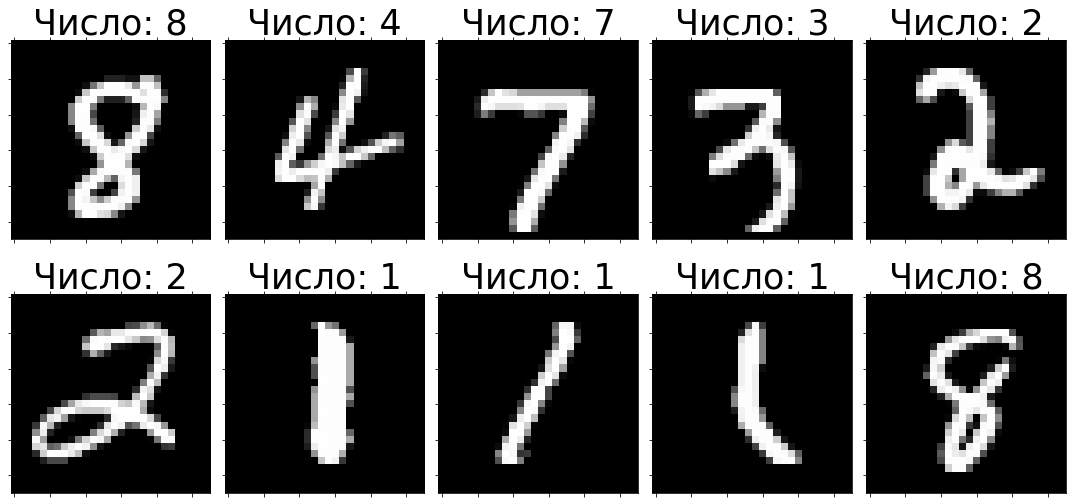

In [6]:
#@title Разные примеры { run: "auto" }
n =  15258 #@param {type:"slider", min:1, max:69984, step:1}

fig = plt.figure( figsize=(15,8) )
for i in range(0,10):
  ax = fig.add_subplot(2,5,i+1)
  ax.set_title("Число: {}".format(str(y[i+n]) ), size=35)
  ax.matshow(1-X.loc[i+n,'pixel1':'pixel784'].values.reshape((28,28)).astype(float),
             cmap='Greys')
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)
  plt.tight_layout()


## Применяем Метод Главных Компонент к Данным

Функция для обработки датасета и визуализации

In [7]:
def mnist_PCA(n):
    pca = PCA(n_components = n)
    pca.fit(X_)
    pca.score(X_)
    pca_result_mnist = pca.transform(X_)
    pca_inverse = pca.inverse_transform(pca_result_mnist)
    print(pca_inverse.shape)
    pca_names = [str(x+1)+' Главная Компонента' for x in range(4)]
    plot_multi(pca_result_mnist, y.astype(int), pca_names)
    W_pca=pca.components.T
    fig=plt.figure(figsize=(15,5))
    for i in range(0,4):
      ax = fig.add_subplot(1,4,i+1,title=str(i+1) )
      ax.set_title("{} собственный \n вектор".format(str(i+1)), size=25)
      ax.matshow(W_pca[i].reshape((28,28)).astype(float), cmap = 'bwr', vmin=-0.20,vmax = 0.20)
      plt.setp(ax.get_xticklabels(), visible=False)
      plt.setp(ax.get_yticklabels(), visible=False)
    plt.tight_layout()
    fig=plt.figure(figsize=(15,7))
    for i in range(0,5):
      ax = fig.add_subplot(2,5,i+1)
      ax.set_title("Реконструкция", size=20)  
      ax.matshow(1-pca_inverse[i,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
      plt.setp(ax.get_xticklabels(), visible=False)
      plt.setp(ax.get_yticklabels(), visible=False)

    for i in range(0,5):
      ax = fig.add_subplot(2,5,i+6)
      ax.set_title("Оригинал", size=25)    
      ax.matshow(1-X_[i,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
      plt.setp(ax.get_xticklabels(), visible=False)
      plt.setp(ax.get_yticklabels(), visible=False)

#### Для количества компонент, равного 10:

(70000, 784)


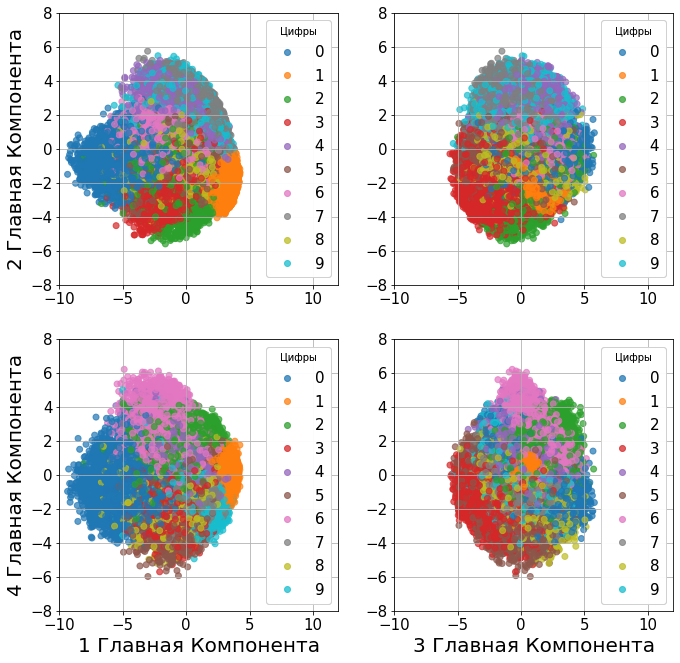

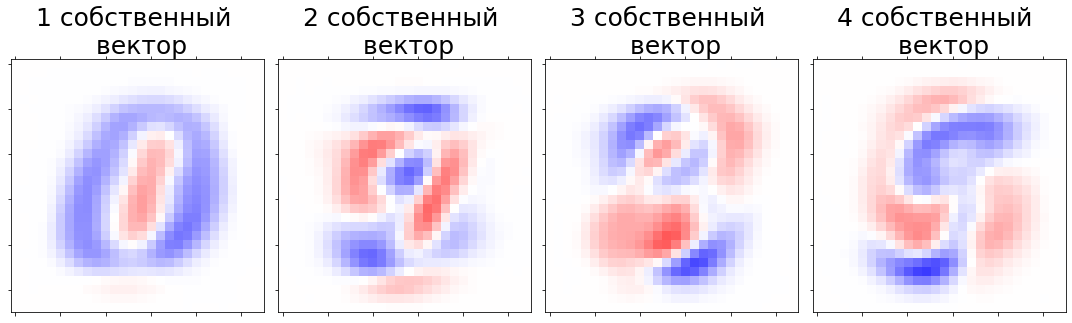

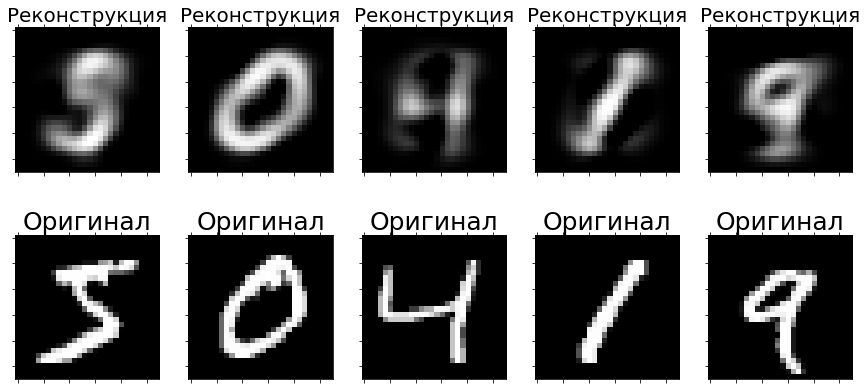

In [8]:
mnist_PCA(10)

#### Для количества компонент, равного 50:

(70000, 784)


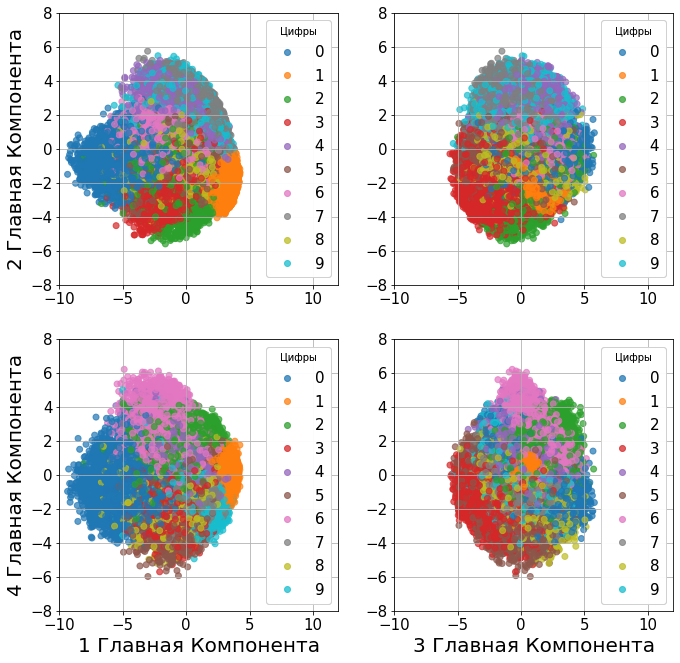

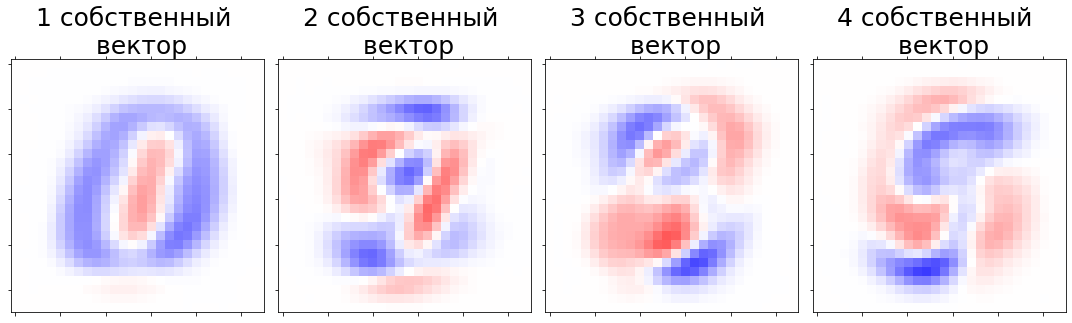

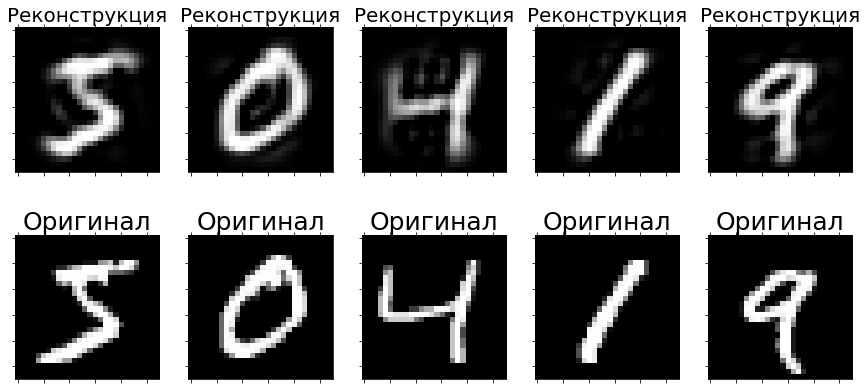

In [9]:
mnist_PCA(50)

#### Для количества компонент, равного 100:

(70000, 784)


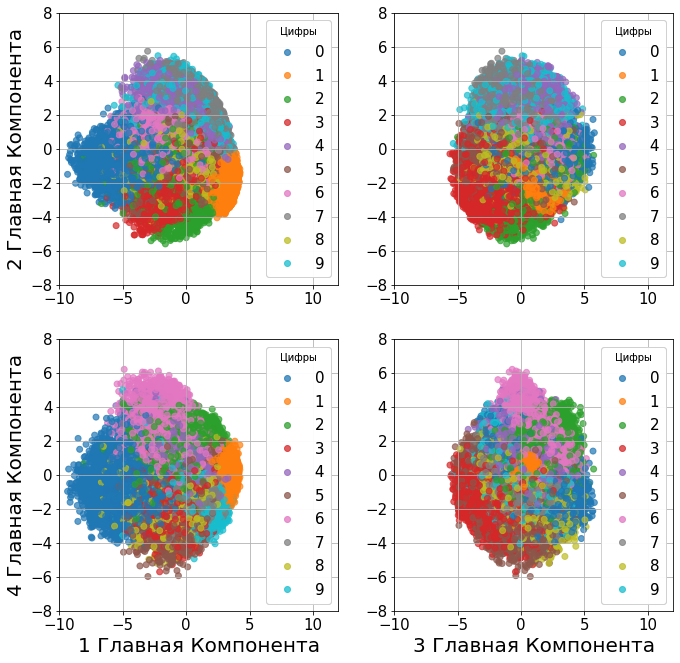

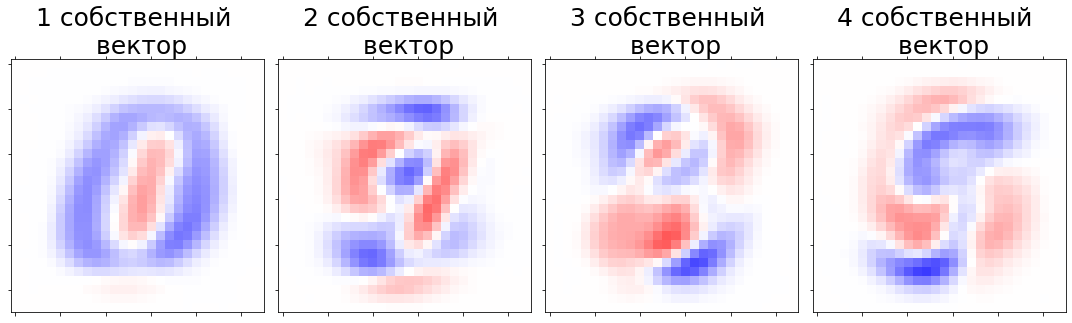

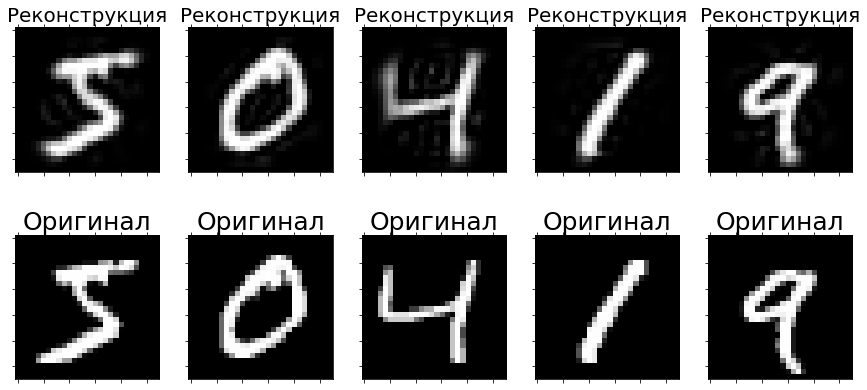

In [10]:
mnist_PCA(100)

#### Для количества компонент, равного 200:

(70000, 784)


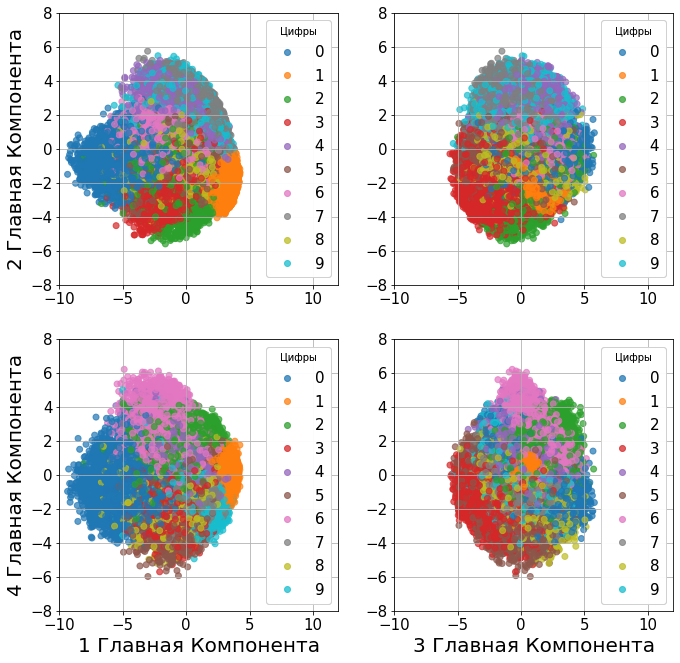

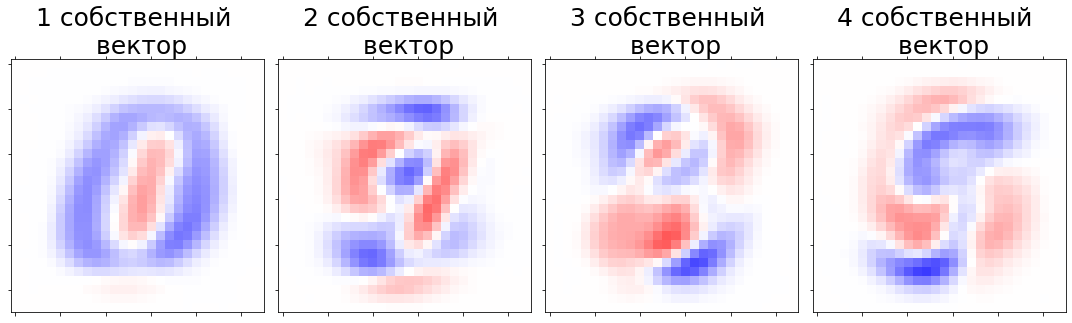

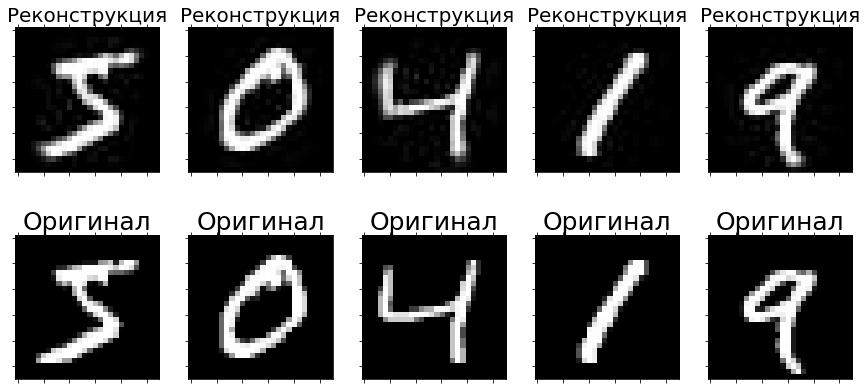

In [11]:
mnist_PCA(200)

#### Для количества компонент, равного 500:

(70000, 784)


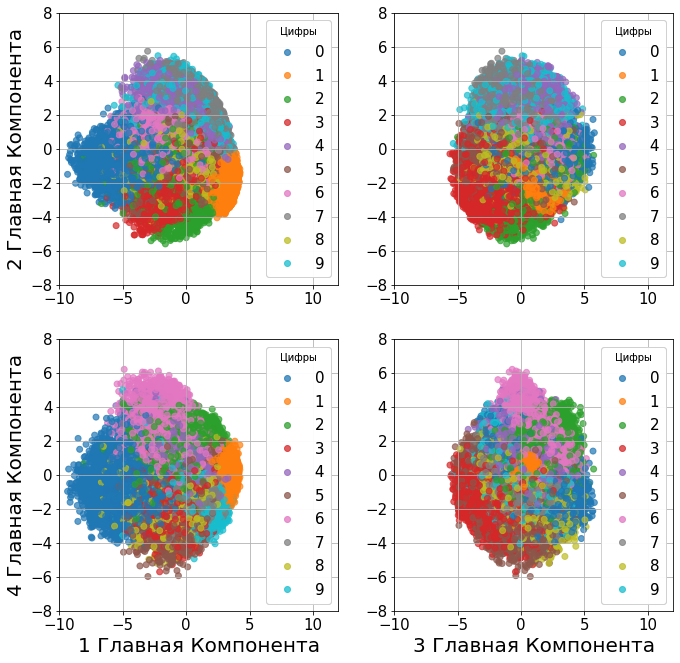

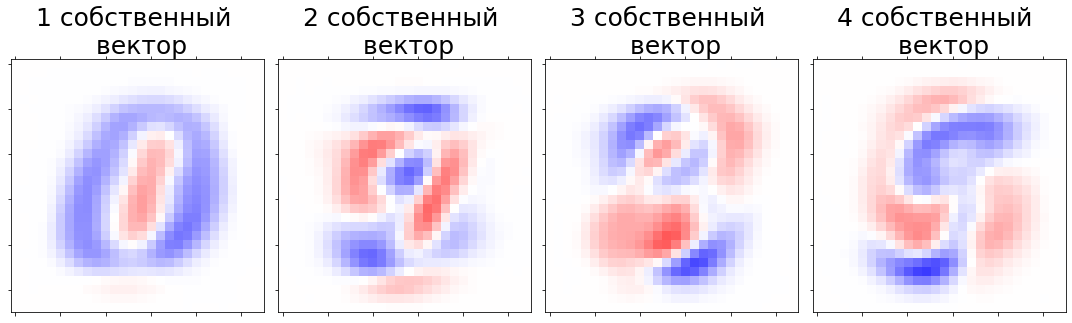

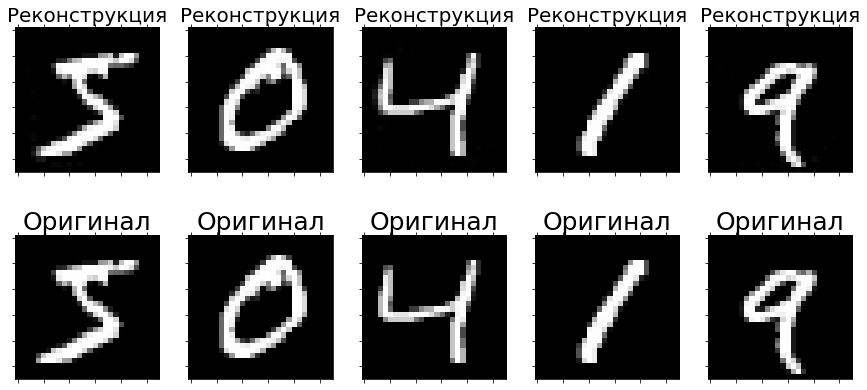

In [12]:
mnist_PCA(500)

#### Для количества компонент, равного 1000:

(70000, 784)


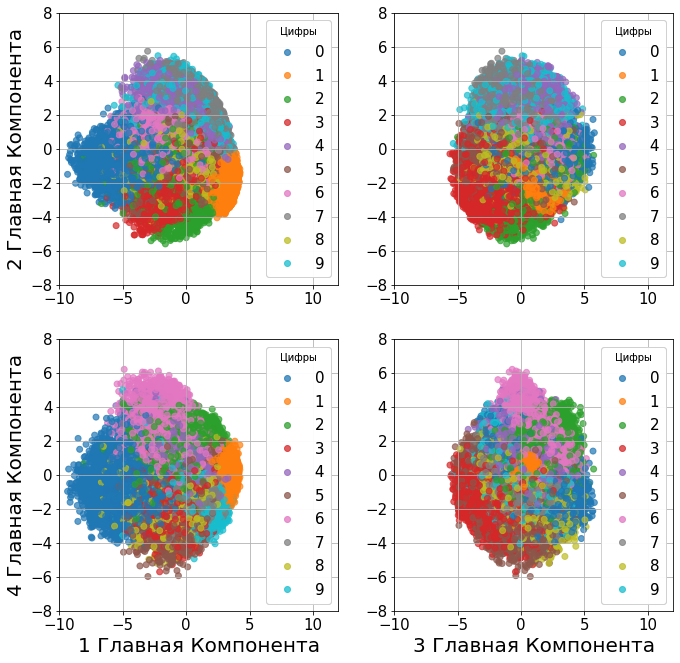

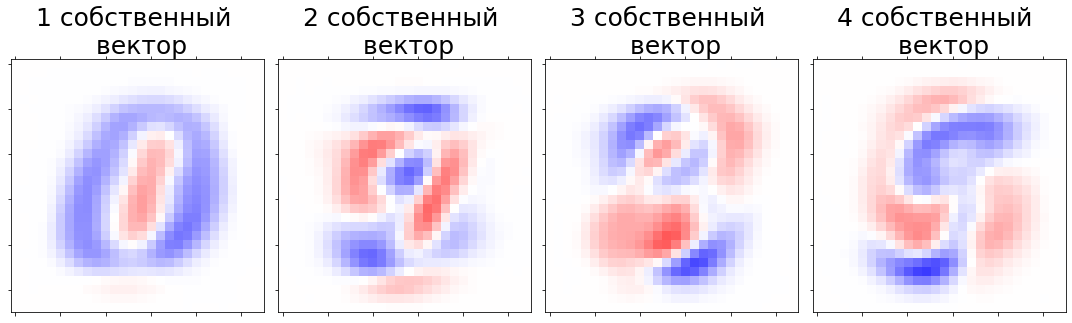

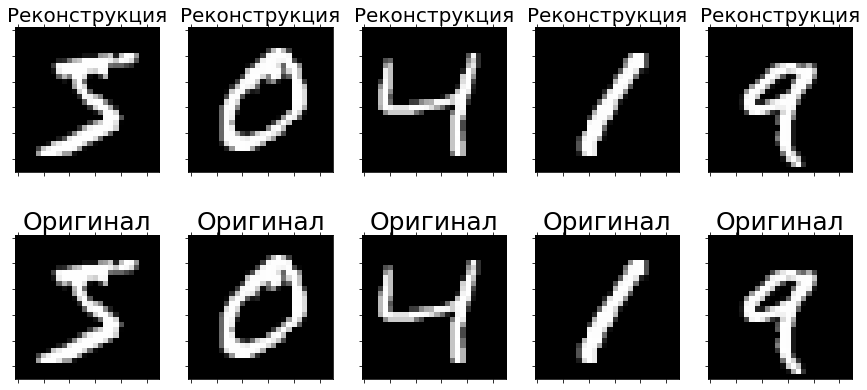

In [13]:
mnist_PCA(1000)

Вывод: с повышением количества компонент точность увеличивается, это можно увидеть например на реконструкции, но она имеет определенный предел, после которого доваление компонент не дает значительного добавленного эффекта

## На данных MNIST определите каким цифрам соответствуют точки со следующими координатами

* PCA-1 -7; PCA-2 0
* PCA-1 4; PCA-4 1
* PCA-3 0; PCA-4 5
* PCA-3 -4; PCA-2 -3

PCA-1 -7; PCA-2  0 - цифра "0"

PCA-1  4; PCA-4  1 - цифра "1"

PCA-3  0; PCA-4  5 - цифра "6"

PCA-3 -4; PCA-2 -3 - цифра "3"

## Набор данных Cars Moldova

Загрузка даьафрейма данных

In [14]:
df = pd.read_csv('./Data/cars_moldova_clean_task1.csv', delimiter = ',')
df.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),km_year,Quantile_km_year
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,17727.272727,Large_km_year
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,16875.000000,Medium_km_year
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,11000.000000,Small_km_year
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,12500.000000,Medium_km_year
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,13636.363636,Medium_km_year


Первичный анализ данных

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32062 entries, 0 to 32061
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32062 non-null  object 
 1   Model                 32062 non-null  object 
 2   Year                  32062 non-null  int64  
 3   Style                 32062 non-null  object 
 4   Distance              32062 non-null  float64
 5   Engine_capacity(cm3)  32062 non-null  float64
 6   Fuel_type             32062 non-null  object 
 7   Transmission          32062 non-null  object 
 8   Price(euro)           32062 non-null  float64
 9   km_year               32062 non-null  float64
 10  Quantile_km_year      32062 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 2.7+ MB


In [16]:
df.describe(include=['category', 'object', 'bool'])

,Make,Model,Style,Fuel_type,Transmission,Quantile_km_year
count,32062,32062,32062,32062,32062,32062
unique,44,135,12,6,2,3
top,Volkswagen,Rare_cheap,Sedan,Diesel,Manual,Medium_km_year
freq,3396,4488,9706,15218,17388,10908


Применим one-hot-encoding

In [17]:
df = pd.concat([df, pd.get_dummies(df.Style, prefix='Style_')], axis=1, sort=False)  
df = df.drop(['Style'], axis=1)
df = pd.concat([df, pd.get_dummies(df.Fuel_type, prefix='Fuel_type_')], axis=1, sort=False)  
df = df.drop(['Fuel_type'], axis=1)
df = pd.concat([df, pd.get_dummies(df.Quantile_km_year, prefix='Quantile_km_year_')], axis=1, sort=False)  
df = df.drop(['Quantile_km_year'], axis=1)
df = pd.concat([df, pd.get_dummies(df.Make, prefix='Make_')], axis=1, sort=False)  
df = df.drop(['Make'], axis=1)
df = pd.concat([df, pd.get_dummies(df.Model, prefix='Model_')], axis=1, sort=False)  
df = df.drop(['Model'], axis=1)
df.head(3)

,Year,Distance,Engine_capacity(cm3),Transmission,Price(euro),km_year,Style__Cabriolet,Style__Combi,Style__Coupe,Style__Crossover,...,Model__Vito,Model__X-Trail,Model__X3,Model__X5,Model__X6,Model__XC60,Model__XC90,Model__Yaris,Model__Zafira,Model__ix35
0,2011,195000.0,1800.0,Automatic,7750.0,17727.272727,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,135000.0,1500.0,Manual,8550.0,16875.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,110000.0,1500.0,Manual,6550.0,11000.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Посмотрим какие типы трансмиссии существуют в датасете

In [18]:
df['Transmission'].unique()

array(['Automatic', 'Manual'], dtype=object)

Создадим колонку 'Target', где укажем 0 - для ручной трасмиссии и 1 - для автоматической

In [19]:
df['Target'] = np.where((df['Transmission']=='Automatic'), 1, 0)
df = df.drop(['Transmission'], axis=1)
df.head(3)

,Year,Distance,Engine_capacity(cm3),Price(euro),km_year,Style__Cabriolet,Style__Combi,Style__Coupe,Style__Crossover,Style__Hatchback,...,Model__X-Trail,Model__X3,Model__X5,Model__X6,Model__XC60,Model__XC90,Model__Yaris,Model__Zafira,Model__ix35,Target
0,2011,195000.0,1800.0,7750.0,17727.272727,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2014,135000.0,1500.0,8550.0,16875.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,110000.0,1500.0,6550.0,11000.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Логистическая регрессия

Применим логистическую регрессия для прогнозирования типа трансмиссии

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

In [21]:
target_name = 'Target'
X = df.drop(columns=target_name)
y = df[target_name]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21481, 205), (10581, 205), (21481,), (10581,))

In [23]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [24]:
%%time

model_lr = LogisticRegression(random_state=21)
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.79      0.87      0.83     11600
           1       0.83      0.73      0.77      9881

    accuracy                           0.80     21481
   macro avg       0.81      0.80      0.80     21481
weighted avg       0.81      0.80      0.80     21481

TEST

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      5788
           1       0.83      0.72      0.77      4793

    accuracy                           0.81     10581
   macro avg       0.81      0.80      0.80     10581
weighted avg       0.81      0.81      0.80     10581

CONFUSION MATRIX

col_0      0     1
Target            
0       5061   727
1       1326  3467
Wall time: 708 ms


#### Примените метод главных компонент для набора данных Cars

In [25]:
X_ = X.values
y = y.values

In [26]:
X_

array([[  2011., 195000.,   1800., ...,      0.,      0.,      0.],
       [  2014., 135000.,   1500., ...,      0.,      0.,      0.],
       [  2012., 110000.,   1500., ...,      0.,      0.,      0.],
       ...,
       [  2015.,  89000.,   1500., ...,      0.,      0.,      0.],
       [  2006., 370000.,   2000., ...,      0.,      0.,      0.],
       [  2006., 300000.,   1500., ...,      0.,      0.,      0.]])

In [27]:
pca = PCA(n_components = 4)
pca.fit(X_)
pca.score(X_)

0.9999999995626868

In [28]:
pca_result = pca.transform(X_)
pca_inverse = pca.inverse_transform(pca_result)
pca_inverse.shape

(32062, 205)

<ipython-input-2-5431fd75da81>:54: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xticks(FontSize = 25); plt.yticks(FontSize = 25);


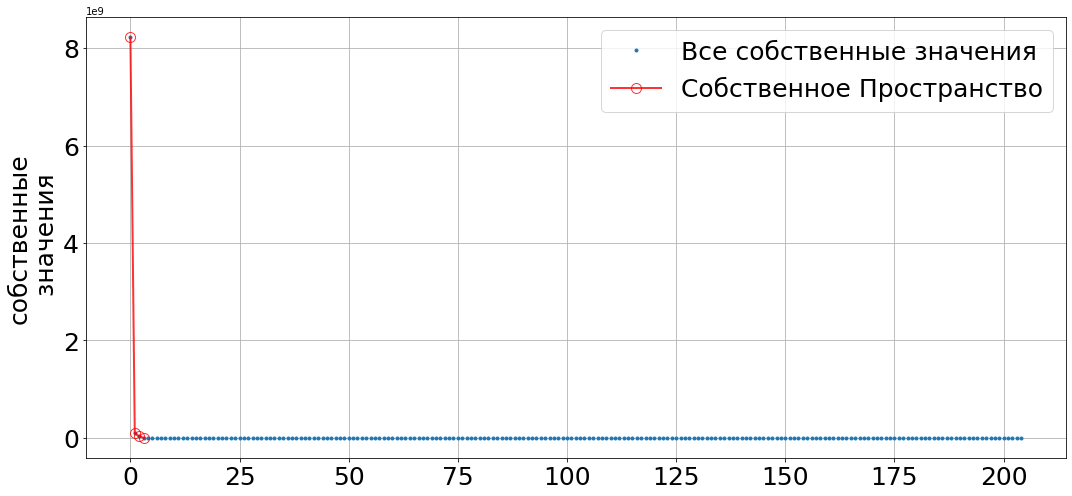

In [29]:
pca.plot_eigvalues();

In [30]:
pca_names = [str(x+1)+' Главная Компонента' for x in range(4)]

**Пространство Главных Компонент**

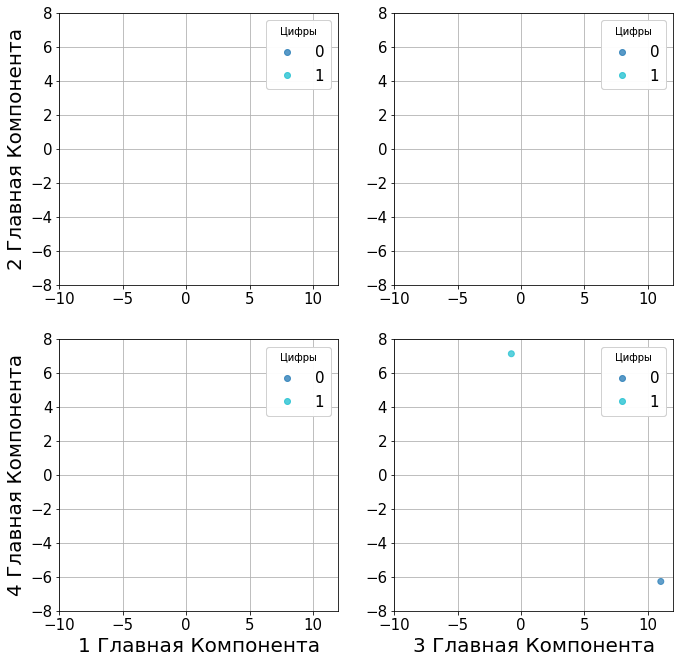

In [31]:
plot_multi(pca_result, y.astype(int), pca_names);

In [32]:
pca.components.shape

(205, 4)

In [33]:
X_new = pca.transform(X)
X_new.shape

(32062, 4)

#### Обучим логистическую регрессию на обработанных данных (метод главных компонент) и сравним результаты

In [34]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_new, y, test_size=0.33, shuffle=True, random_state=21)
X_train_pca.shape, X_test_pca.shape, y_train_pca.shape, y_test_pca.shape

((21481, 4), (10581, 4), (21481,), (10581,))

In [35]:
%%time

model_lr_pca = LogisticRegression(random_state=21)
model_lr_pca.fit(X_train_pca, y_train_pca)

y_train_pred_pca = model_lr_pca.predict(X_train_pca)
y_test_pred_pca = model_lr_pca.predict(X_test_pca)

get_classification_report(y_train_pca, y_train_pred_pca, y_test_pca, y_test_pred_pca)

TRAIN

              precision    recall  f1-score   support

           0       0.77      0.89      0.83     11600
           1       0.85      0.69      0.76      9881

    accuracy                           0.80     21481
   macro avg       0.81      0.79      0.80     21481
weighted avg       0.81      0.80      0.80     21481

TEST

              precision    recall  f1-score   support

           0       0.78      0.90      0.83      5788
           1       0.85      0.69      0.76      4793

    accuracy                           0.80     10581
   macro avg       0.81      0.79      0.80     10581
weighted avg       0.81      0.80      0.80     10581

CONFUSION MATRIX

col_0     0     1
row_0            
0      5182   606
1      1472  3321
Wall time: 175 ms


Вывод: результаты практически идентичные, при этом метод главных компонент позволил облегчить и ускорить модель практически в 4 раза:
* Wall time: 708 ms
* Wall time: 175 ms